# Simple linear regression

#Steps
1. Reading and understanding the data
2. Training the model
3. Residual analysis
4. Predicting and evaluating on the test set

Goal is to build regression model by using this dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


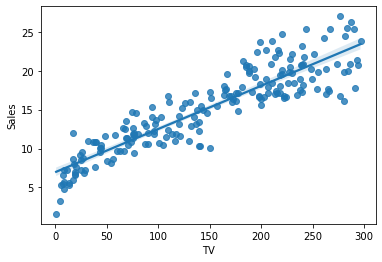

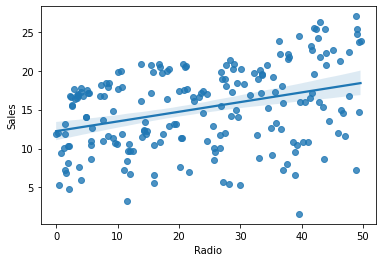

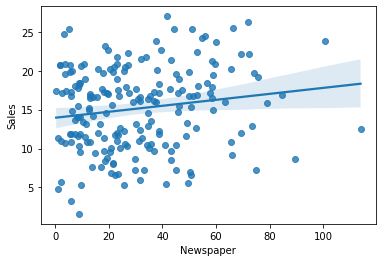

In [7]:
# visualize the data
sns.regplot(x="TV", y="Sales", data=advertising)
plt.show()
sns.regplot(x="Radio", y="Sales", data=advertising)
plt.show()
sns.regplot(x="Newspaper", y="Sales", data=advertising)
plt.show()

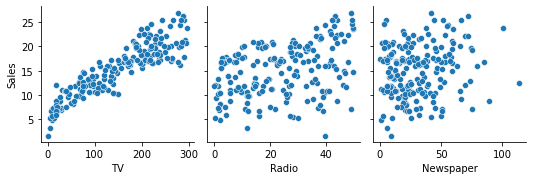

In [8]:
sns.pairplot(x_vars=["TV","Radio","Newspaper"], y_vars="Sales", data=advertising)
plt.show()

In [9]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


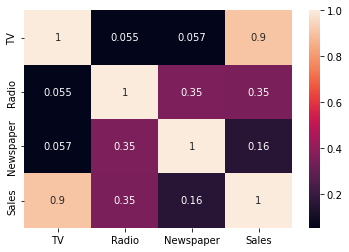

In [10]:
sns.heatmap(advertising.corr(), annot=True)
plt.show()

TV is our target variable
we will build a model on TV

Equation of linear regression

𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛
 
𝑦 is the response
𝑐 is the intercept
𝑚1 is the coefficient for the first feature
𝑚𝑛 is the coefficient for the nth feature

In our case:

𝑦=𝑐+𝑚1×𝑇𝑉
 
The 𝑚 values are called the model coefficients or model parameters.

# Steps 
- create X and Y 
- Create train and test sets (70-30) (80-20)
- train your model on the training set (i.e. learn the coefficients)
- Evaluate the model (Training set, Test set)

In [11]:
# Create X and y
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
X = advertising["TV"]
y = advertising["Sales"]

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [14]:
X_train.shape

(140,)

In [15]:
X_test.shape

(60,)

In [16]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [17]:
# Training the model 
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

C:\Users\Ajinkya\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [25]:
lr = sm.OLS(y_train, X_train_sm) #Ordinary Least Squares
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

## Sales = 6.948683 + 0.054546.TV

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.52e-52
Time:                        18:00:47   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

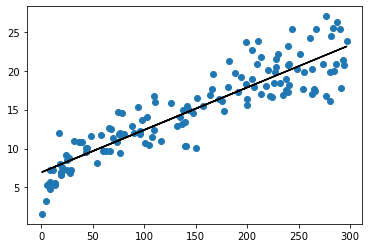

In [35]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_train_pred, "black")
plt.show()

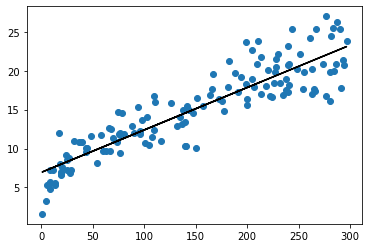

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train,6.9487 + 0.0545*X_train, "black")
plt.show()

# Step 3. Resudual analysis

# Eroor = f(y_train, y_train_pred)
# this error term is normally distributed 

In [34]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

In [37]:
res = y_train - y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

C:\Users\Ajinkya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


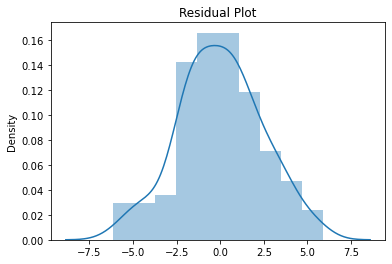

In [40]:
# plot the residuals 
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

#### look for patterns in residuals

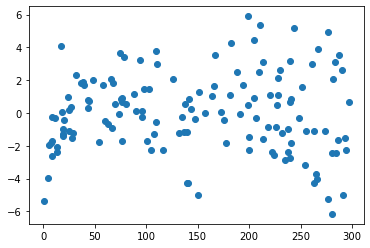

In [42]:
plt.scatter(X_train, res)
plt.show()

# Predicting and evaluating on the test set

### predictions on the test set (y_test_pred)
### evaluate the model, r-suqared on the test 

In [46]:
# add a constatnt/intercept to the test

X_test_sm = sm.add_constant(X_test)

# pred on test

y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

C:\Users\Ajinkya\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [53]:
#  evaluate the model, r-suqared on the test 
# r-suqared

r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245658

In [54]:
# r2 on train data

r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
r2

0.8157933136480389

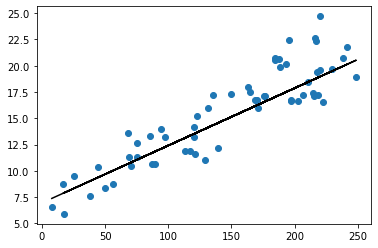

In [56]:
plt.scatter(X_test, y_test)
plt.plot(X_test,y_test_pred, "black")
plt.show()


# Linear regression using SKlearn

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [62]:
# reshape X_train 
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [65]:
# Steps in sklearn model building
#1. create an object on linear regression 

lm = LinearRegression()

#2. fit the model 

lm.fit(X_train_lm,y_train)


LinearRegression()

In [67]:
#3. see the parameters of the model, make predictions (train test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.9486832000013585


In [69]:
# make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [70]:
# 4. evaluate the model r2
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.8157933136480388
0.792103160124566
